**Семинар 1**

In [1]:
from sem_1 import *
from sem_2 import *
from sem_3 import *

In [2]:
xi_p, xi1_p, a = simulate_collisions(check_conservation=True, save_to_file=False)

Проверки сохранения:
Относительная скорость: 3.55e-15
Энергия: 5.68e-14
Импульс: 1.78e-15


In [3]:
xi_p

array([[ 3.86435502,  5.0570413 , -0.24072051],
       [ 4.54397831,  0.66514499,  2.58690825],
       [ 4.57692388, -2.82368939, -1.76380941],
       ...,
       [-0.8488423 ,  2.24697062, -0.44527097],
       [ 2.60363097,  1.26175475, -2.69317276],
       [ 6.10961514, -3.65517703, -0.29109011]])

**Семинар 2**

In [4]:
N = 20
xi_cut = 4.8

(xi_x, xi_y, xi_z), dxi = create_velocity_grid(N, N, N, xi_cut)

In [5]:
a_snapped, snapped_idx = snap_collision_velocities(a, (xi_x, xi_y, xi_z), dxi)

In [6]:
a_snapped_filtered, snapped_idx_filtered = filter_collision_nodes(a_snapped, snapped_idx, xi_cut)
print(np.shape(a_snapped_filtered))
print("Первая проверка по размеру пройдена")

(8, 2765)
Первая проверка по размеру пройдена


In [7]:
a_updated = compute_post_collision_velocities_sem_2(a_snapped_filtered, 1.0)

In [8]:
lam1, lam2, mu1, mu2, r = find_interpolating_nodes_and_weights(a_updated, (xi_x, xi_y, xi_z), dxi, xi_cut)

In [9]:
print(np.shape(lam1))
print("Вторая проверка по размеру пройдена")

(3, 1658)
Вторая проверка по размеру пройдена


In [10]:
print("проверка r:")
np.all((r >= 0) & (r <= 1))

проверка r:


True

In [11]:
print("Проверка закона сохранения импульса")
print("lam1 + mu1:")
print(lam1 + mu1)
print("lam2 + mu2:")
print(lam2 + mu2)
print("Видно, что все координаты либо совпадают, либо отличаются на +-1")

Проверка закона сохранения импульса
lam1 + mu1:
[[16 27 28 ... 11 19 30]
 [21 20 18 ... 18 18 17]
 [21  7 23 ... 13 21 29]]
lam2 + mu2:
[[15 28 29 ... 11 20 30]
 [20 21 19 ... 18 19 17]
 [20  8 24 ... 13 22 29]]
Видно, что все координаты либо совпадают, либо отличаются на +-1


**Семинар 3**

In [12]:
import sem_3
import importlib
importlib.reload(sem_3)

<module 'sem_3' from '/Users/ivankasyanov/Desktop/Физтех/3 курс/ВычМаты/проект/Без названия/compmathproject/code/sem_3.py'>

In [13]:
N = 20
xi_cut = 4.8
tau = 0.02
T_tilde = 0.95
time_steps = int(0.4 / tau)
# f_max = 1 / ((2 * pi) ** 1.5)
# V_sph = 4 * pi * xi_cut ** 3 / 3
N_0 = 4224
W_min = (N_0 * xi_cut ** 4) / (6 * sqrt(pi))
N_v = int(W_min * tau)
f, xi_grid, dxi = initialize_distribution(N, xi_cut, T_tilde, condition=1)
print("initialize_distribution done")
n, u, T = compute_macro_parameters(f, xi_grid, dxi)
print("compute_macro_parameters done")
u_star, T_star = newton_method(xi_grid, dxi, u, T)
print("newton_method done")
f_M = np.exp(-0.5 * (xi_grid - u_star) ** 2 / T_star)
volume = dxi[0] * dxi[1] * dxi[2]
f_M /= np.sum(f_M, axis = 0) * volume
# print(np.sum((f - f_M) ** 2))
initial_norms = compute_norms(f, f_M, xi_grid, dxi, xi_cut)
print("compute_norms done")
delta_k = []
for t in range(time_steps):
    # Добавляем номер шага в вывод
    print(f"\n--- Step {t+1}/{time_steps} ---")
    
    # Вычисление интеграла столкновений
    f = compute_collision_integral(f, xi_grid, dxi, xi_cut, N_v, tau=tau)
    print(f"Step {t+1}: compute_collision_integral done")
    
    # Вычисление норм
    norms = compute_norms(f, f_M, xi_grid, dxi, xi_cut)
    print(f"Step {t+1}: compute_norms done")
    
    # Сохранение результатов
    delta_k.append([norm / init_norm for norm, init_norm in zip(norms, initial_norms)])

initialize_distribution done
compute_macro_parameters done
newton_method done
compute_norms done

--- Step 1/20 ---
Step 1: compute_collision_integral done
Step 1: compute_norms done

--- Step 2/20 ---


/var/folders/qq/pjggzry53mq7xbvhcjr59g800000gp/T/ipykernel_1349/2664325811.py:37: RuntimeWarning: invalid value encountered in divide
  delta_k.append([norm / init_norm for norm, init_norm in zip(norms, initial_norms)])


Step 2: compute_collision_integral done
Step 2: compute_norms done

--- Step 3/20 ---
Step 3: compute_collision_integral done
Step 3: compute_norms done

--- Step 4/20 ---
Step 4: compute_collision_integral done
Step 4: compute_norms done

--- Step 5/20 ---
Step 5: compute_collision_integral done
Step 5: compute_norms done

--- Step 6/20 ---
Step 6: compute_collision_integral done
Step 6: compute_norms done

--- Step 7/20 ---
Step 7: compute_collision_integral done
Step 7: compute_norms done

--- Step 8/20 ---
Step 8: compute_collision_integral done
Step 8: compute_norms done

--- Step 9/20 ---
Step 9: compute_collision_integral done
Step 9: compute_norms done

--- Step 10/20 ---
Step 10: compute_collision_integral done
Step 10: compute_norms done

--- Step 11/20 ---
Step 11: compute_collision_integral done
Step 11: compute_norms done

--- Step 12/20 ---
Step 12: compute_collision_integral done
Step 12: compute_norms done

--- Step 13/20 ---
Step 13: compute_collision_integral done
Ste

Проверка №1. Консервативность интеграла.

Проверка №2. Симметрия интеграла. <mark>(Исправленная, проверить работает ли)</mark>

~~Проверка №3. Сходимость интеграла по шагу скоростной сетки.~~

In [17]:
# Conservation check
n_new, u_new, T_new = compute_macro_parameters(f, xi_grid, dxi)
print(f"Conservation check: Δn={abs(n_new - n)}, Δu={np.linalg.norm(u_new - u)}, ΔT={abs(T_new - T)}")

# Symmetry check
f_0 = f.copy()
tau_sym = 1e-6
time_steps_sym = int(100 * tau_sym / tau)
for _ in range(time_steps_sym):
    f = compute_collision_integral(f, xi_grid, dxi, xi_cut, N_v, tau=tau_sym)
I = (f - f_0) / (100 * tau_sym)

# Проверяем форму массива I для диагностики
print("Shape of I:", I.shape)  # Должно быть (N, N) для 2D

# Вычисляем симметричную ошибку для 2D массива
sym_error = np.sqrt(np.sum((I[:N//2, :] - I[N-1:N//2-1:-1, :])**2)) / np.sqrt(0.5 * np.sum(I**2))
print(f"Symmetry error: {sym_error}")

# Convergence and other checks would require additional runs with different N and p
# Plotting delta_k vs model solution

t = np.array([i * tau for i in range(time_steps)])
model = -t * (16 / (5 * sqrt(2 * pi))) * sqrt(T)

# Repeat for t=2 and condition=2 as needed

Conservation check: Δn=0.0, Δu=0.0, ΔT=0.0
Shape of I: (3, 20)


ValueError: operands could not be broadcast together with shapes (3,20) (0,20) 

Сохранение и загрузка посчитанных данных

In [2]:
import os
import numpy as np
import json

# Создаём папку для данных, если ее нет
os.makedirs('data', exist_ok=True)

# Сохраняем все данные
def save_all_data():
    data_to_save = {
        # Основные массивы
        'delta_k': delta_k,
        'f_M': f_M,
        'xi_grid': xi_grid,
        'dxi': dxi,

        # Макропараметры
        'n': n,
        'u': u,
        'T': T,
        'u_star': u_star,
        'T_star': T_star,

        # Нормы и модель
        'initial_norms': initial_norms,

        # Параметры симуляции
        'params': {
            'N': N,
            'xi_cut': xi_cut,
            'tau': tau,
            'T_tilde': T_tilde,
            'time_steps': time_steps,
            'N_0': N_0,
            'N_v': N_v
        }
    }

    # Сохраняем numpy массивы
    np.save('data/delta_k.npy', data_to_save['delta_k'])
    np.save('data/f_Maxwell.npy', data_to_save['f_M'])
    np.save('data/xi_grid.npy', data_to_save['xi_grid'])
    np.save('data/dxi.npy', data_to_save['dxi'])
    np.save('data/initial_norms.npy', data_to_save['initial_norms'])

    # Сохраняем скалярные параметры и векторы
    with open('data/parameters.json', 'w') as file:
        json.dump({
            'n': data_to_save['n'],
            'u': data_to_save['u'].tolist(),
            'T': data_to_save['T'],
            'u_star': data_to_save['u_star'].tolist(),
            'T_star': data_to_save['T_star'],
            'params': data_to_save['params']
        }, file, indent=4)

# Загружаем данные
def load_all_data():
    data = {'delta_k': np.load('data/delta_k.npy'), 'f_M': np.load('data/f_Maxwell.npy'),
            'xi_grid': np.load('data/xi_grid.npy'), 'dxi': np.load('data/dxi.npy'),
            'initial_norms': np.load('data/initial_norms.npy')}

    # Загружаем numpy массивы

    # Загружаем скалярные параметры
    with open('data/parameters.json', 'r') as file:
        params_data = json.load(file)
        data.update(params_data)
        data['u'] = np.array(data['u'])
        data['u_star'] = np.array(data['u_star'])

    return data

# Проверка целостности данных
def verify_data(original, loaded):
    # Проверка массивов
    checks = [
        ('delta_k', np.allclose(original['delta_k'], loaded['delta_k'], rtol=1e-6, atol=1e-8, equal_nan=True)),
        ('f_M', np.allclose(original['f_M'], loaded['f_M'])),
        ('xi_grid', np.allclose(original['xi_grid'], loaded['xi_grid'])),
        ('dxi', np.allclose(original['dxi'], loaded['dxi'])),
        ('initial_norms', np.allclose(original['initial_norms'], loaded['initial_norms'])),
        ('n', np.isclose(original['n'], loaded['n'])),
        ('u', np.allclose(original['u'], loaded['u'])),
        ('T', np.isclose(original['T'], loaded['T'])),
        ('u_star', np.allclose(original['u_star'], loaded['u_star'])),
        ('T_star', np.isclose(original['T_star'], loaded['T_star'])),
    ]

    # Проверка параметров
    param_checks = [
        (k, original['params'][k] == loaded['params'][k])
        for k in original['params']
    ]

    # Вывод результатов
    print("Результаты проверки:")
    for name, status in checks + param_checks:
        print(f"{name:15}: {'OK' if status else 'FAIL'}")

    return all(status for _, status in checks + param_checks)

In [16]:
# Сохраняем данные после выполнения основного кода
save_all_data()

# Загружаем данные
loaded_data = load_all_data()

# Создаём оригинальные данные для проверки
original_data = {
    'delta_k': delta_k,
    'f_M': f_M,
    'xi_grid': xi_grid,
    'dxi': dxi,
    'initial_norms': initial_norms,
    'n': n,
    'u': u,
    'T': T,
    'u_star': u_star,
    'T_star': T_star,
    'params': {
        'N': N,
        'xi_cut': xi_cut,
        'tau': tau,
        'T_tilde': T_tilde,
        'time_steps': time_steps,
        'N_0': N_0,
        'N_v': N_v
    }
}

# Проверяем целостность
if verify_data(original_data, loaded_data):
    print("\nВсе данные сохранены и загружены корректно!")
else:
    print("\nОбнаружены расхождения в данных!")

Результаты проверки:
delta_k        : OK
f_M            : OK
xi_grid        : OK
dxi            : OK
initial_norms  : OK
n              : OK
u              : OK
T              : OK
u_star         : OK
T_star         : OK
N              : OK
xi_cut         : OK
tau            : OK
T_tilde        : OK
time_steps     : OK
N_0            : OK
N_v            : OK

Все данные сохранены и загружены корректно!


In [13]:
data = load_all_data()
delta_k = data['delta_k']
f_M = data['f_M']
xi_grid = data['xi_grid']

array([[3.25228211, 2.96836216, 2.97369628, 2.97903529, 2.98437917,
        2.98972791, 2.9950815 , 3.00043992, 3.00580316, 3.01117121,
        3.01654406, 3.02192169, 3.02730409, 3.03269125, 3.03808315,
        3.04347979, 3.04888114, 3.0542872 , 3.05969795, 3.06511338],
       [2.89498163, 3.03694161, 3.03427454, 3.03160504, 3.0289331 ,
        3.02625873, 3.02358194, 3.02090273, 3.0182211 , 3.01553708,
        3.01285066, 3.01016184, 3.00747064, 3.00477706, 3.00208111,
        2.99938279, 2.99668212, 2.99397909, 2.99127371, 2.988566  ],
       [2.89498163, 3.03694161, 3.03427454, 3.03160504, 3.0289331 ,
        3.02625873, 3.02358194, 3.02090273, 3.0182211 , 3.01553708,
        3.01285066, 3.01016184, 3.00747064, 3.00477706, 3.00208111,
        2.99938279, 2.99668212, 2.99397909, 2.99127371, 2.988566  ]])

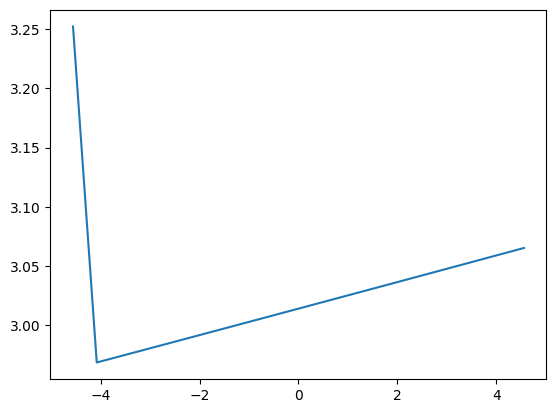

In [21]:
x = np.ones(len(f_M))
import matplotlib.pyplot as plt
plt.plot(xi_grid[0], f_M[0])

In [23]:
xi_grid[0]

array([-4.56, -4.08, -3.6 , -3.12, -2.64, -2.16, -1.68, -1.2 , -0.72,
       -0.24,  0.24,  0.72,  1.2 ,  1.68,  2.16,  2.64,  3.12,  3.6 ,
        4.08,  4.56])

In [25]:
data = load_all_data()
xi_grid = data['xi_grid']
dxi = data['dxi']
f_M = data['f_M']
xi_x, xi_y, xi_z = np.meshgrid(xi_grid[0], xi_grid[1], xi_grid[2], indexing='ij')
xi_x = xi_x.flatten()
xi_y = xi_y.flatten()
xi_z = xi_z.flatten()
f_M = f_M.flatten()

In [28]:
np.histogram(xi_x)

(array([800, 800, 800, 800, 800, 800, 800, 800, 800, 800]),
 array([-4.56 , -3.648, -2.736, -1.824, -0.912,  0.   ,  0.912,  1.824,
         2.736,  3.648,  4.56 ]))

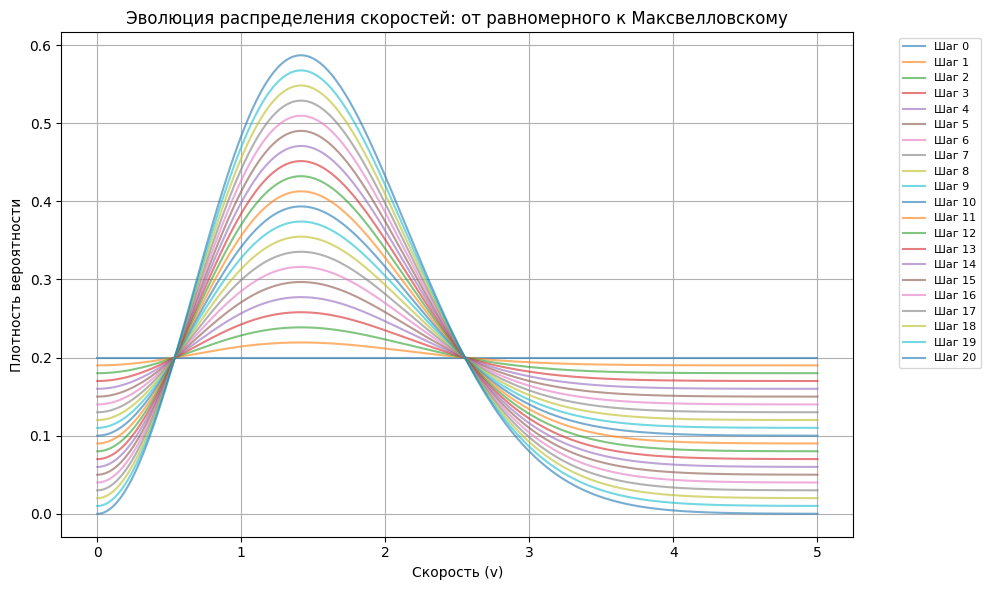

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data = load_all_data()

for step in range(20):
    xi_grid = data['xi_grid'][step]
    f= data['f_M'][step]
    plt.plot(xi_grid, f, label=f"Шаг {step}", alpha=0.6)

plt.title("Эволюция распределения скоростей: от равномерного к Максвелловскому")
plt.xlabel("Скорость (v)")
plt.ylabel("Плотность вероятности")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=8)
plt.tight_layout()
plt.grid(True)

# Сохраняем в файл
plt.savefig("evolution_maxwell.png", dpi=300)
plt.show()
